In [1]:
%matplotlib inline
import matplotlib.pyplot as plt, mpld3, glob, os
import pandas as pd, seaborn as sn, numpy as np
sn.set_context('talk')

In [2]:
# Hack to force Python 2 to recognise utf-8 encodings. See here:
# http://jonathansoma.com/tutorials/international-data/python-and-utf-8/
# Note that using this breaks subsequent print statements in the 
# notebook, which is annoying!
import sys
reload(sys)
sys.setdefaultencoding("utf-8")

# Krypsiv (part 2)

A [previous notebook](http://nbviewer.jupyter.org/github/JamesSample/krypsiv/blob/master/krypsiv.ipynb) explored plotting options for the krypsiv dataset. The plots required for the 2016 report are detailed in an e-mail from Therese, received 02/11/2016 at 09:54. A follow-up e-mail from Kate (02/11/2016 at 15:33) provides links to some additional datasets that need to be considered. The aim of this notebook is to produce PNG versions of the plots requested by Therese.

## 1. Proportions plots

### 1.1. Algal proportions

The code below reproduces the plot from section 1.2.3 of the [previous notebook](http://nbviewer.jupyter.org/github/JamesSample/krypsiv/blob/master/krypsiv.ipynb) and saves it as a PNG. Things to check:

 * Is the y-axis label of "Proporsjon (%)" OK? <br><br>
 
 * The data from HIL (on the Tovdalselva) for 2014 do not add to 100%. This is the only location/year with partial data. Is this correct? 

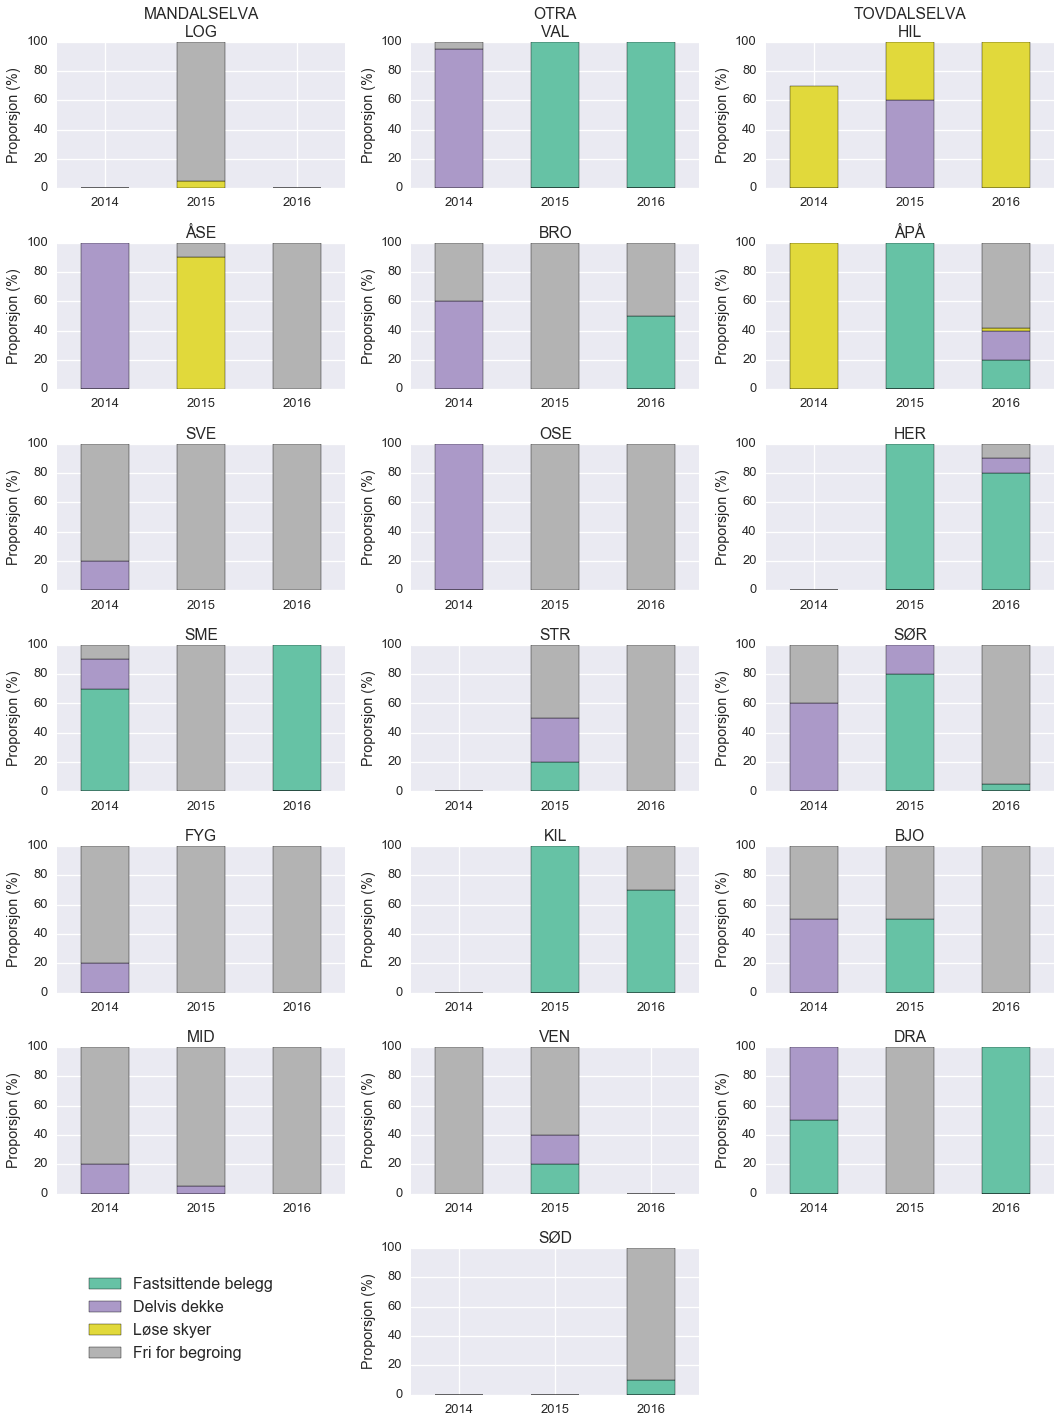

In [3]:
# Read data
in_xls = (r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Data'
          r'\Tidied\proportions.xlsx')
df = pd.read_excel(in_xls, sheetname='proportions')

# Define cols for algae
alg_cols = set([u'Løse skyer', u'Fastsittende belegg', u'Delvis dekke', 
                u'Fri for begroing', 'BEGsum'])
sub_cols = set(['Blokker', 'Stein', 'Grus', 'Fin grus', 'Sand', 
                'Silt/leire', 'Organisk orig', 'Organisk', 'Mod', 'SUBsum'])

# Get just the algal data
alg_df = df[list(set(df.columns) - sub_cols)]
del alg_df['BEGsum']

# Empty df with ordered index. Used to fill missing
# years at some sites with NaN
idx_df = pd.DataFrame({}, index=[2014, 2015, 2016])

# Plot
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15,20))

# Rivers by column
for col, riv in enumerate(['Mandalselva', 'Otra', 'Tovdalselva']):
    riv_df = alg_df.query('Elv == @riv')

    # Sites by row
    for row, site in enumerate(riv_df['Kortnavn'].unique()):
        site_df = riv_df.query('Kortnavn == @site')
        site_df.drop(['Elv', 'Kortnavn', 'ID', 'Name'], axis=1, inplace=True)
        site_df.set_index('Year', inplace=True)
        site_df = idx_df.join(site_df)
        site_df.plot.bar(stacked=True, ax=axes[row, col], legend=False,
                         colormap='Set2')

        # Titles etc.
        if row == 0:
            axes[row, col].set_title('%s\n%s' % (riv.upper(), site))
        else:
            axes[row, col].set_title(site)
        axes[row, col].set_xlabel('')
        axes[row, col].set_xticklabels(axes[row, col].xaxis.get_majorticklabels(), 
                                       rotation=0)
        axes[row, col].set_ylabel('Proporsjon (%)')
        
        # Legend
        if (row==6) and (col==1):
            axes[row, col].legend(loc='upper center', bbox_to_anchor=(-0.8, 0.9), 
                                  fontsize=16)

# We only have 6 sites at Mandalselva and Tovdalselva, so
# remove 7th row for these
fig.delaxes(axes[6, 0])
fig.delaxes(axes[6, 2])

plt.tight_layout()

# Save 
out_fold = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Plots'
out_path = os.path.join(out_fold, 'algal_proportions.png')
plt.savefig(out_path, dpi=300)

### 1.2. Substrate proportions

As suggested by Therese in her e-mail, I've added a column called `Org_Mod` to the substrate data where I've adjusted the organic proportions so that the totals equal 100%. I've also added an asterisk (\*) to any year where the proportions have been modified. Note there are still three sites/years where the numbers are a bit strange:

 * VAL in 2014 has 200% boulders *and* 100% organic. The overall total is currently 380%. <br><br>
 
 * Even removing the organic column, the total for VAL in 2016 is 110%. One of the other columns also need reducing? <br><br>
 
 * SØR in 2016 currently sums to 157%, but with only 15% organic. Some of the other classes will therefore need reducing too.
 
These values will need checking and adjusting. Also check that the y-label is OK.

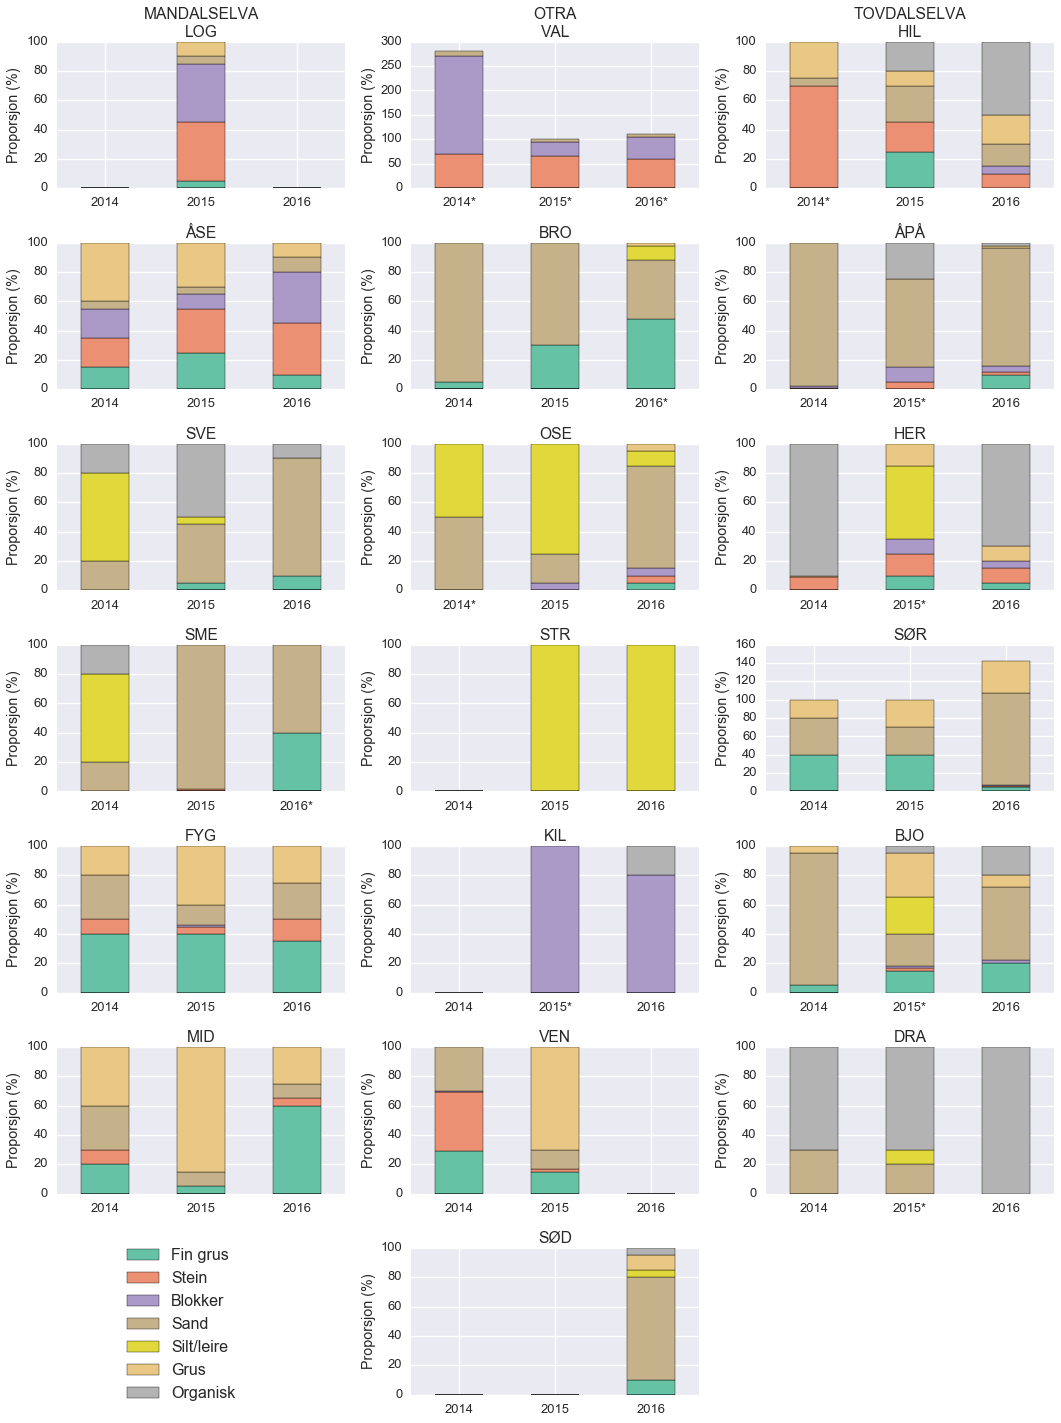

In [4]:
# Read data
in_xls = (r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Data'
          r'\Tidied\proportions.xlsx')
df = pd.read_excel(in_xls, sheetname='proportions')

# Define cols for algae
alg_cols = set([u'Løse skyer', u'Fastsittende belegg', u'Delvis dekke', 
                u'Fri for begroing', 'BEGsum'])
sub_cols = set(['Blokker', 'Stein', 'Grus', 'Fin grus', 'Sand', 
                'Silt/leire', 'Organisk orig', 'Organisk', 'Mod', 'SUBsum'])

# Get just the algal data
sub_df = df[list(set(df.columns) - alg_cols)]
del sub_df['SUBsum'], sub_df['Organisk orig']

# Empty df with ordered index. Used to fill missing
# years at some sites with NaN
idx_df = pd.DataFrame({}, index=[2014, 2015, 2016])

# Plot
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15,20))

# Rivers by column
for col, riv in enumerate(['Mandalselva', 'Otra', 'Tovdalselva']):
    riv_df = sub_df.query('Elv == @riv')

    # Sites by row
    for row, site in enumerate(riv_df['Kortnavn'].unique()):
        site_df = riv_df.query('Kortnavn == @site')
        
        # Get whether the organic content at this site has been modified
        mods = site_df.sort_values(by='Year')['Mod'].values

        # Replace '-' with ''
        mods = ['' if x=='-' else x for x in mods]
        
        # Plot
        site_df.drop(['Elv', 'Kortnavn', 'ID', 'Name', 'Mod'], axis=1, inplace=True)
        site_df.set_index('Year', inplace=True)
        site_df = idx_df.join(site_df)
        site_df.plot.bar(stacked=True, ax=axes[row, col], legend=False,
                         colormap='Set2')

        # Modify labels with * where necessary
        labels = [item.get_text() for item in axes[row, col].get_xticklabels()]
        labels = ['%s%s' % t for t in zip(labels, mods)]
        axes[row, col].set_xticklabels(labels)
        
        # Titles etc.
        if row == 0:
            axes[row, col].set_title('%s\n%s' % (riv.upper(), site))
        else:
            axes[row, col].set_title(site)
        axes[row, col].set_xlabel('')
        axes[row, col].set_xticklabels(axes[row, col].xaxis.get_majorticklabels(), 
                                       rotation=0)
        axes[row, col].set_ylabel('Proporsjon (%)')
        
        # Legend
        if (row==6) and (col==1):
            axes[row, col].legend(loc='upper center', bbox_to_anchor=(-0.8, 1.1), 
                                  fontsize=16)
            
# We only have 6 sites at Mandalselva and Tovdalselva, so
# remove 7th row for these
fig.delaxes(axes[6, 0])
fig.delaxes(axes[6, 2])

plt.tight_layout()

# Save 
out_fold = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Plots'
out_path = os.path.join(out_fold, 'substrate_proportions.png')
plt.savefig(out_path, dpi=300)

## 2. Bar charts of nuisance versus non-nuisance

### 2.1. Algal proportions

#### 2.1.1. All sites

**Modified 11/11/2016:** Therese wants the bar plots to be based just on the 2016 data. Have added an additional line of code for this below. Remove this to go back to using data from all years.

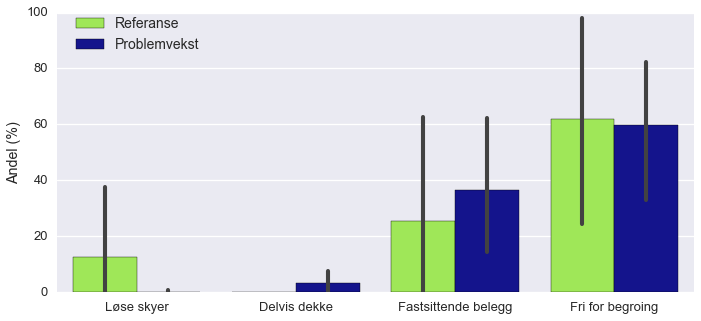

In [5]:
# Read data
in_xls = (r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Data'
          r'\Tidied\proportions.xlsx')
df = pd.read_excel(in_xls, sheetname='proportions')

# Define cols for algae and substrate
alg_cols = set([u'Løse skyer', u'Fastsittende belegg', u'Delvis dekke', 
                u'Fri for begroing', 'BEGsum'])
sub_cols = set(['Blokker', 'Stein', 'Grus', 'Fin grus', 'Sand', 
                'Silt/leire', 'Organisk orig', 'Organisk', 'Mod', 'SUBsum'])

# Get just the algal data
alg_df = df[list(set(df.columns) - sub_cols)]
del alg_df['BEGsum']

# 'Melt' to long data format
alg_df = pd.melt(alg_df, 
                 id_vars=['Kortnavn', 'Name', 'ID', 'Elv', 'Year'], 
                 var_name='Class', 
                 value_name='Andel (%)')

# Read site_type
typ_df = pd.read_excel(in_xls, sheetname='site_type')
del typ_df['Kortnavn']

# Join
alg_df = pd.merge(alg_df, typ_df,
                  how='left', on='Name')

# Use just the 2016 data
alg_df = alg_df.query('Year == 2016')

# Plot
g = sn.factorplot(x='Class', y='Andel (%)', hue='Type',
                  data=alg_df, 
                  kind='bar', 
                  order=[u'Løse skyer', 'Delvis dekke', 'Fastsittende belegg', 'Fri for begroing'],
                  hue_order=['Referanse', 'Problemvekst'],
                  size=5, aspect=2, 
                  estimator=np.mean, ci=95,
                  palette={'Referanse':'#9FFF40',
                           'Problemvekst':'#0000A0'},
                  legend=False)

plt.legend(loc='upper left', bbox_to_anchor=(0.01, 1.03), 
           fontsize=14)

plt.xlabel('')

# Save 
out_fold = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Plots'
out_path = os.path.join(out_fold, 'alg_bar_nuis_all_2016.png')
plt.savefig(out_path, dpi=300)

#### 2.1.2. Split by river

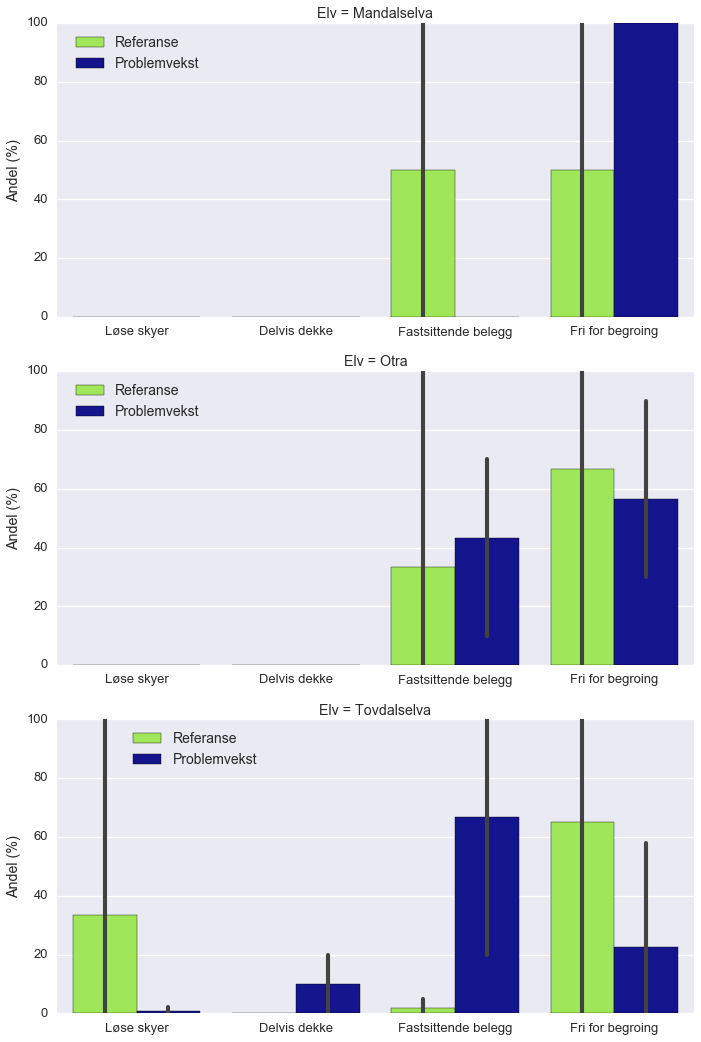

In [6]:
g = sn.factorplot(x='Class', y='Andel (%)', hue='Type',
                  data=alg_df, row='Elv',
                  kind='bar', 
                  order=[u'Løse skyer', 'Delvis dekke', 'Fastsittende belegg', 'Fri for begroing'],
                  hue_order=['Referanse', 'Problemvekst'],
                  sharex=False,
                  size=5, aspect=2, 
                  estimator=np.mean, ci=95,
                  palette={'Referanse':'#9FFF40',
                           'Problemvekst':'#0000A0'},
                  legend=False)

g.axes[0, 0].legend(loc='upper left', bbox_to_anchor=(0.01, 1), 
                    fontsize=14)
g.axes[1, 0].legend(loc='upper left', bbox_to_anchor=(0.01, 1), 
                    fontsize=14)
g.axes[2, 0].legend(loc='upper left', bbox_to_anchor=(0.1, 1), 
                    fontsize=14)
plt.xlabel('')

# Save 
out_fold = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Plots'
out_path = os.path.join(out_fold, 'alg_bar_nuis_by_riv_2016.png')
plt.savefig(out_path, dpi=300)

### 2.2. Substrate proportions

#### 2.2.1. All sites

**Modified 11/11/2016:** Therese wants the bar plots to be based just on the 2016 data. Have added an additional line of code for this below. Remove this to go back to using data from all years.

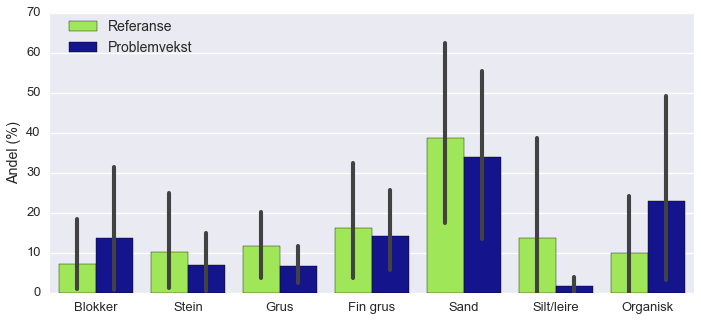

In [7]:
# Read data
in_xls = (r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Data'
          r'\Tidied\proportions.xlsx')
df = pd.read_excel(in_xls, sheetname='proportions')

# Define cols for algae and substrate
alg_cols = set([u'Løse skyer', u'Fastsittende belegg', u'Delvis dekke', 
                u'Fri for begroing', 'BEGsum'])
sub_cols = set(['Blokker', 'Stein', 'Grus', 'Fin grus', 'Sand', 
                'Silt/leire', 'Organisk orig', 'Organisk', 'Mod', 'SUBsum'])

# Get just the algal data
sub_df = df[list(set(df.columns) - alg_cols)]
del sub_df['SUBsum'], sub_df['Organisk orig'], sub_df['Mod']

# 'Melt' to long data format
sub_df = pd.melt(sub_df, 
                 id_vars=['Kortnavn', 'Name', 'ID', 'Elv', 'Year'], 
                 var_name='Class', 
                 value_name='Andel (%)')

# Read site_type
typ_df = pd.read_excel(in_xls, sheetname='site_type')
del typ_df['Kortnavn']

# Join
sub_df = pd.merge(sub_df, typ_df,
                  how='left', on='Name')

# Use just the 2016 data
sub_df = sub_df.query('Year == 2016')

# Plot
g = sn.factorplot(x='Class', y='Andel (%)', hue='Type',
                  data=sub_df, 
                  kind='bar', 
                  order=['Blokker', 'Stein', 'Grus', 'Fin grus', 'Sand', 'Silt/leire', 'Organisk'],
                  hue_order=['Referanse', 'Problemvekst'],
                  size=5, aspect=2, 
                  estimator=np.mean, ci=95,
                  palette={'Referanse':'#9FFF40',
                           'Problemvekst':'#0000A0'},
                  legend=False)

plt.legend(loc='upper left', bbox_to_anchor=(0.01, 1.02), 
           fontsize=14)

plt.xlabel('')

# Save 
out_fold = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Plots'
out_path = os.path.join(out_fold, 'sub_bar_nuis_all_2016.png')
plt.savefig(out_path, dpi=300)

#### 2.2.2. Split by river

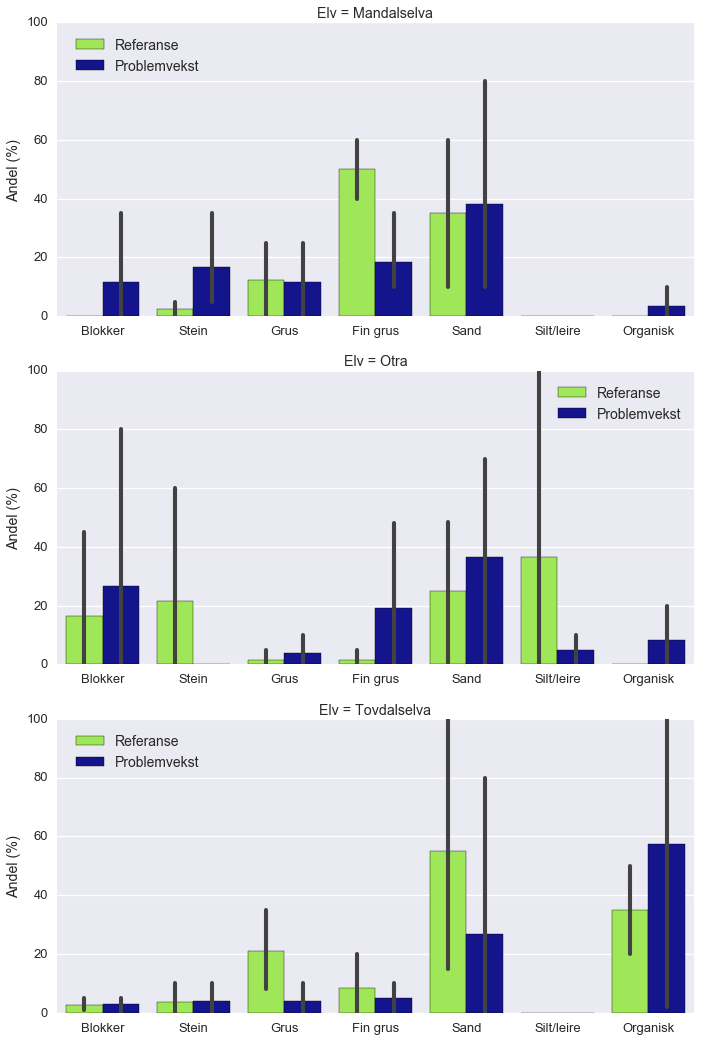

In [8]:
g = sn.factorplot(x='Class', y='Andel (%)', hue='Type',
                  data=sub_df, row='Elv',
                  kind='bar', 
                  order=['Blokker', 'Stein', 'Grus', 'Fin grus', 'Sand', 'Silt/leire', 'Organisk'],
                  hue_order=['Referanse', 'Problemvekst'],
                  sharex=False,
                  size=5, aspect=2, 
                  estimator=np.mean, ci=95,
                  palette={'Referanse':'#9FFF40',
                           'Problemvekst':'#0000A0'},
                  legend=False)

g.axes[0, 0].legend(loc='upper left', bbox_to_anchor=(0.01, 0.99), 
                    fontsize=14)
g.axes[1, 0].legend(loc='upper right', bbox_to_anchor=(1, 0.99), 
                    fontsize=14)
g.axes[2, 0].legend(loc='upper left', bbox_to_anchor=(0.01, 0.99), 
                    fontsize=14)
plt.xlabel('')

# Save 
out_fold = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Plots'
out_path = os.path.join(out_fold, 'sub_bar_nuis_by_riv_2016.png')
plt.savefig(out_path, dpi=300)

## 3. Water chemistry

### 3.1. Line plots per site

Can any of these params be removed (e.g. to make a nice rectangular plot?)

In [9]:
# Folder to save in 
out_fold = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Plots\chem_ts_by_site'

# Read data
in_xls = (r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Data'
          r'\Tidied\chem.xlsx')
df = pd.read_excel(in_xls, sheetname='data')

# 'Melt' to long data format
df = pd.melt(df, 
             id_vars=['Kortnavn', 'Name', 'ID', 'Year'], 
             var_name='Param', 
             value_name='Value')

# Join in PV or Ref
df = pd.merge(df, typ_df,
              how='left', on='Name')

# Get list of sites to process
sites_no = df['Kortnavn'].unique()

# Loop over sites
for site in sites_no:   
    # Get data
    site_df = df.query('Kortnavn == @site')

    # Plot
    g = sn.factorplot(x='Year', y='Value', 
                      col='Param', col_wrap=4,
                      data=site_df, 
                      kind='point',
                      col_order=[u'Vann cond. (µS/cm)', 'Vann temp. (C)', 'Vann pH', 'Vann redox (mV)',
                                 u'PW cond. (µS/cm)', 'PW temp. (C)', 'PW pH', 'PW redox (mV)',
                                 u'NH4 (µg N/l)', 'NO3+NO2 (µg N/l)', 'CO2 (mg C/l)', 'TotP (µg P/l)',
                                 u'PW NH4 (µg N/l)', 'PW NO3+NO2 (µg N/l)', 'PW CO2 (mg C/l)', 'PW TotP (µg P/l)',
                                 'SO4 (mg/l)', 'TOC (mg C/l)', u'PO4 (µg P/l)', 'PW Fe (mg/l)'],
                      sharex=False,
                      sharey=False)

    g.set(ylabel='')
    g.set(xlabel='')
    plt.suptitle(site, fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    
    # Save
    out_path = os.path.join(out_fold, 'chem_ts_%s.png' % site)
    plt.savefig(out_path, dpi=300)
    
    plt.close()

### 3.2. Line plots of nuisance versus non-nuisance

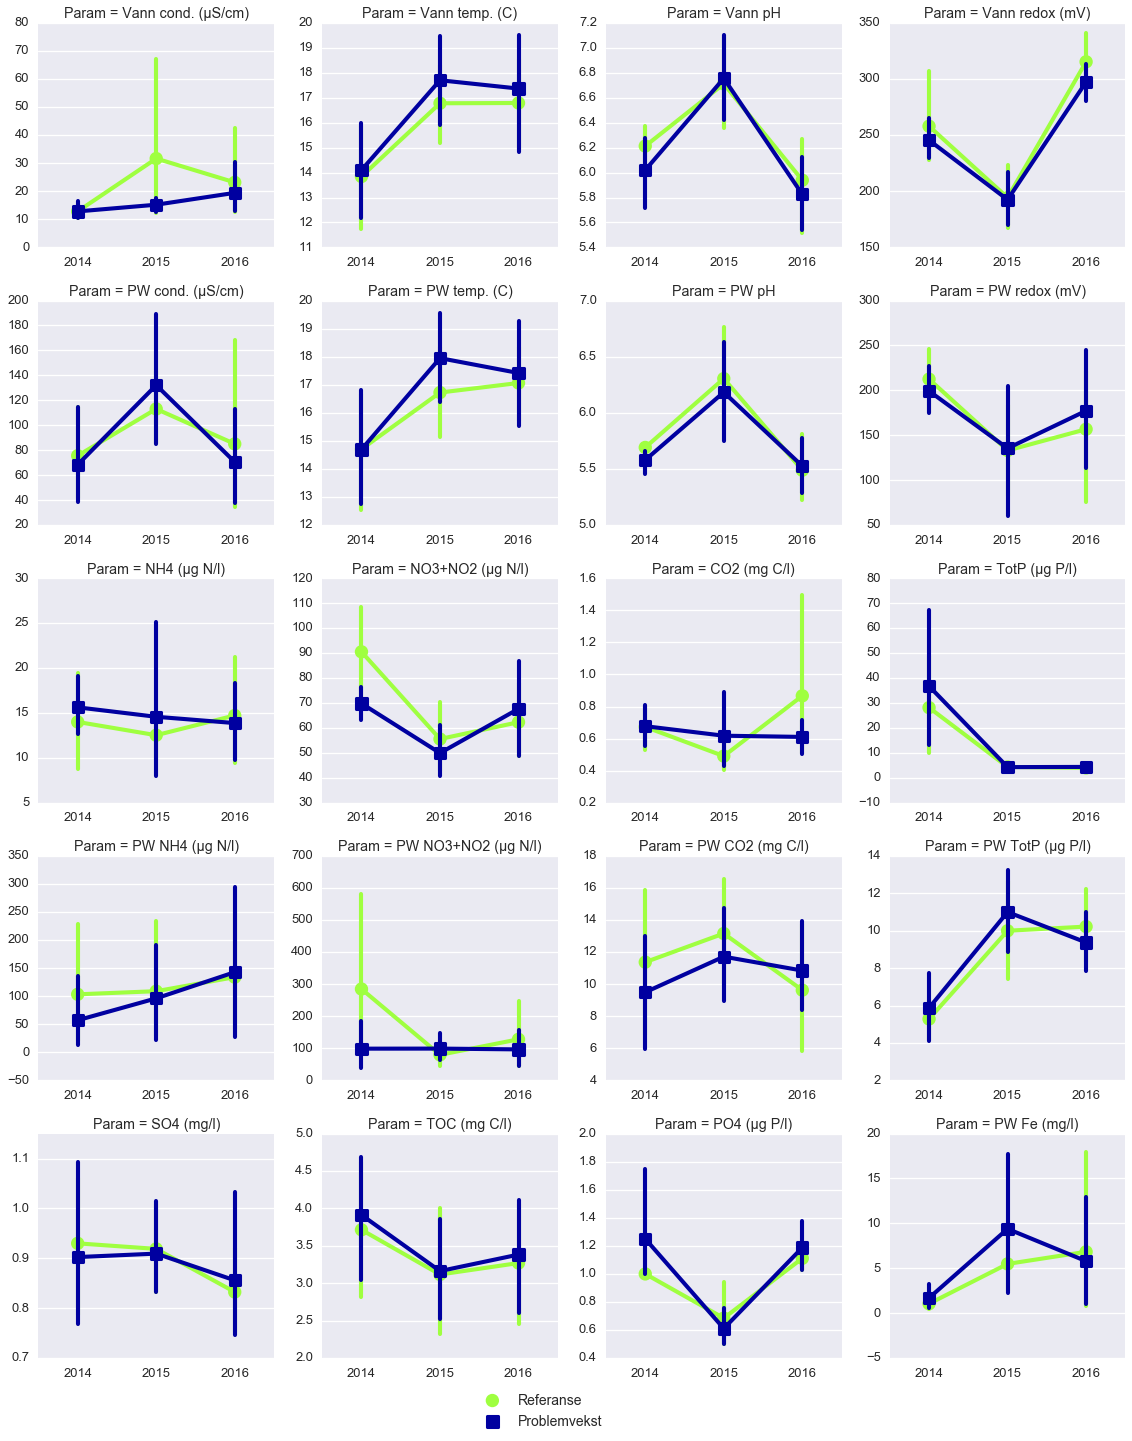

In [10]:
# Plot
g = sn.factorplot(x='Year', y='Value', hue='Type',
                  col='Param', col_wrap=4,
                  data=df, 
                  kind='point',
                  col_order=[u'Vann cond. (µS/cm)', 'Vann temp. (C)', 'Vann pH', 'Vann redox (mV)',
                             u'PW cond. (µS/cm)', 'PW temp. (C)', 'PW pH', 'PW redox (mV)',
                             u'NH4 (µg N/l)', 'NO3+NO2 (µg N/l)', 'CO2 (mg C/l)', 'TotP (µg P/l)',
                             u'PW NH4 (µg N/l)', 'PW NO3+NO2 (µg N/l)', 'PW CO2 (mg C/l)', 'PW TotP (µg P/l)',
                             'SO4 (mg/l)', 'TOC (mg C/l)', u'PO4 (µg P/l)', 'PW Fe (mg/l)'],
                  ci=95,
                  sharex=False,
                  sharey=False,
                  margin_titles=True,
                  markers=['o', 's'],
                  palette={'Referanse':'#9FFF40',
                           'Problemvekst':'#0000A0'},
                  legend=False)

g.set(ylabel='')
g.set(xlabel='')
g.axes[-1].legend(loc='upper left', bbox_to_anchor=(-1.8, -0.1), 
                  fontsize=14)
plt.tight_layout()
plt.subplots_adjust(bottom=0.05)

# Save
out_fold = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Plots'
out_path = os.path.join(out_fold, 'chem_ts_all_by_type.png')
plt.savefig(out_path, dpi=300)

### 3.3a. Box plots for nuisance versus non-nuisance

**Added 11/11/2016**. Therese would like box plots for **just 2016**, in the same style as those from section 2.3 of the first notebook (*krypsiv.ipynb*).

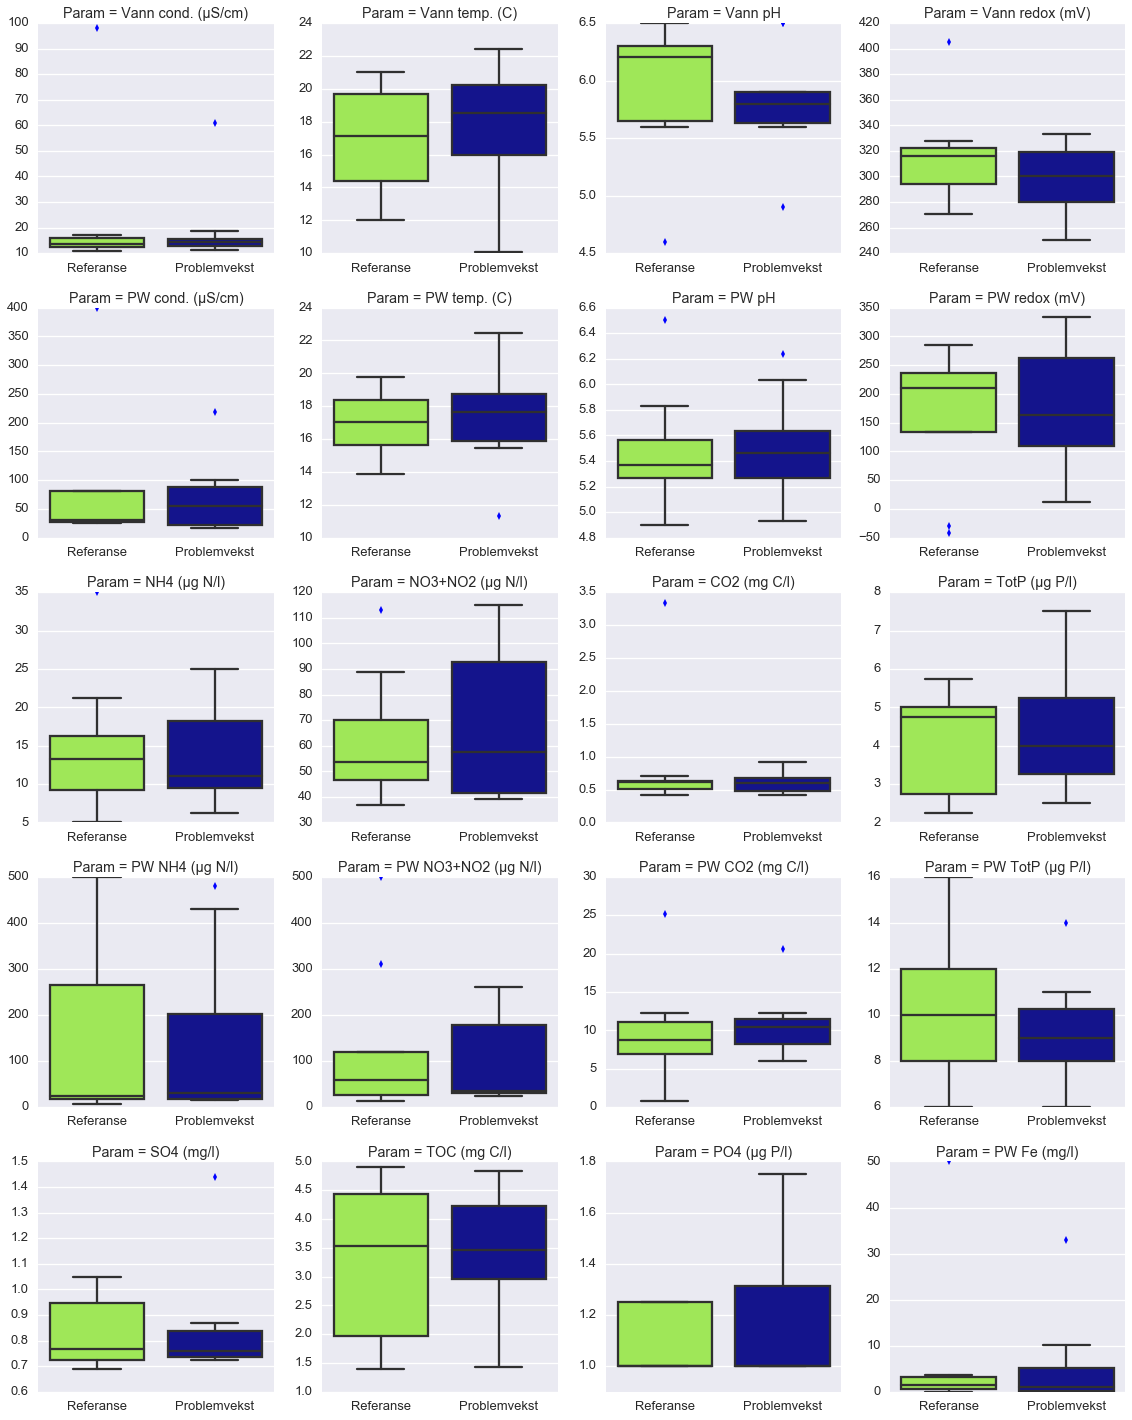

In [11]:
# Get just 2016 data
df2 = df.query('Year == 2016')

# Plot
g = sn.factorplot(x='Type', y='Value', 
                  col='Param', col_wrap=4,
                  data=df2, 
                  kind='box',
                  col_order=[u'Vann cond. (µS/cm)', 'Vann temp. (C)', 'Vann pH', 'Vann redox (mV)',
                             u'PW cond. (µS/cm)', 'PW temp. (C)', 'PW pH', 'PW redox (mV)',
                             u'NH4 (µg N/l)', 'NO3+NO2 (µg N/l)', 'CO2 (mg C/l)', 'TotP (µg P/l)',
                             u'PW NH4 (µg N/l)', 'PW NO3+NO2 (µg N/l)', 'PW CO2 (mg C/l)', 'PW TotP (µg P/l)',
                             'SO4 (mg/l)', 'TOC (mg C/l)', u'PO4 (µg P/l)', 'PW Fe (mg/l)'],
                  sharex=False,
                  sharey=False,
                  palette={'Referanse':'#9FFF40',
                           'Problemvekst':'#0000A0'},
                  legend=False)

g.set(ylabel='')
g.set(xlabel='')
plt.tight_layout()

# Save
out_fold = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Plots'
out_path = os.path.join(out_fold, 'chem_by_type_2016.png')
plt.savefig(out_path, dpi=300)

### 3.3b. Boxplots of nuisance versus non-nuisance all years

**Added 15/11/2016:** Therese would like to test for differences between nuisance and non-nuisance sites for each chemical parameter (see e-mail received 15/11/2016 at 11:40 for details).

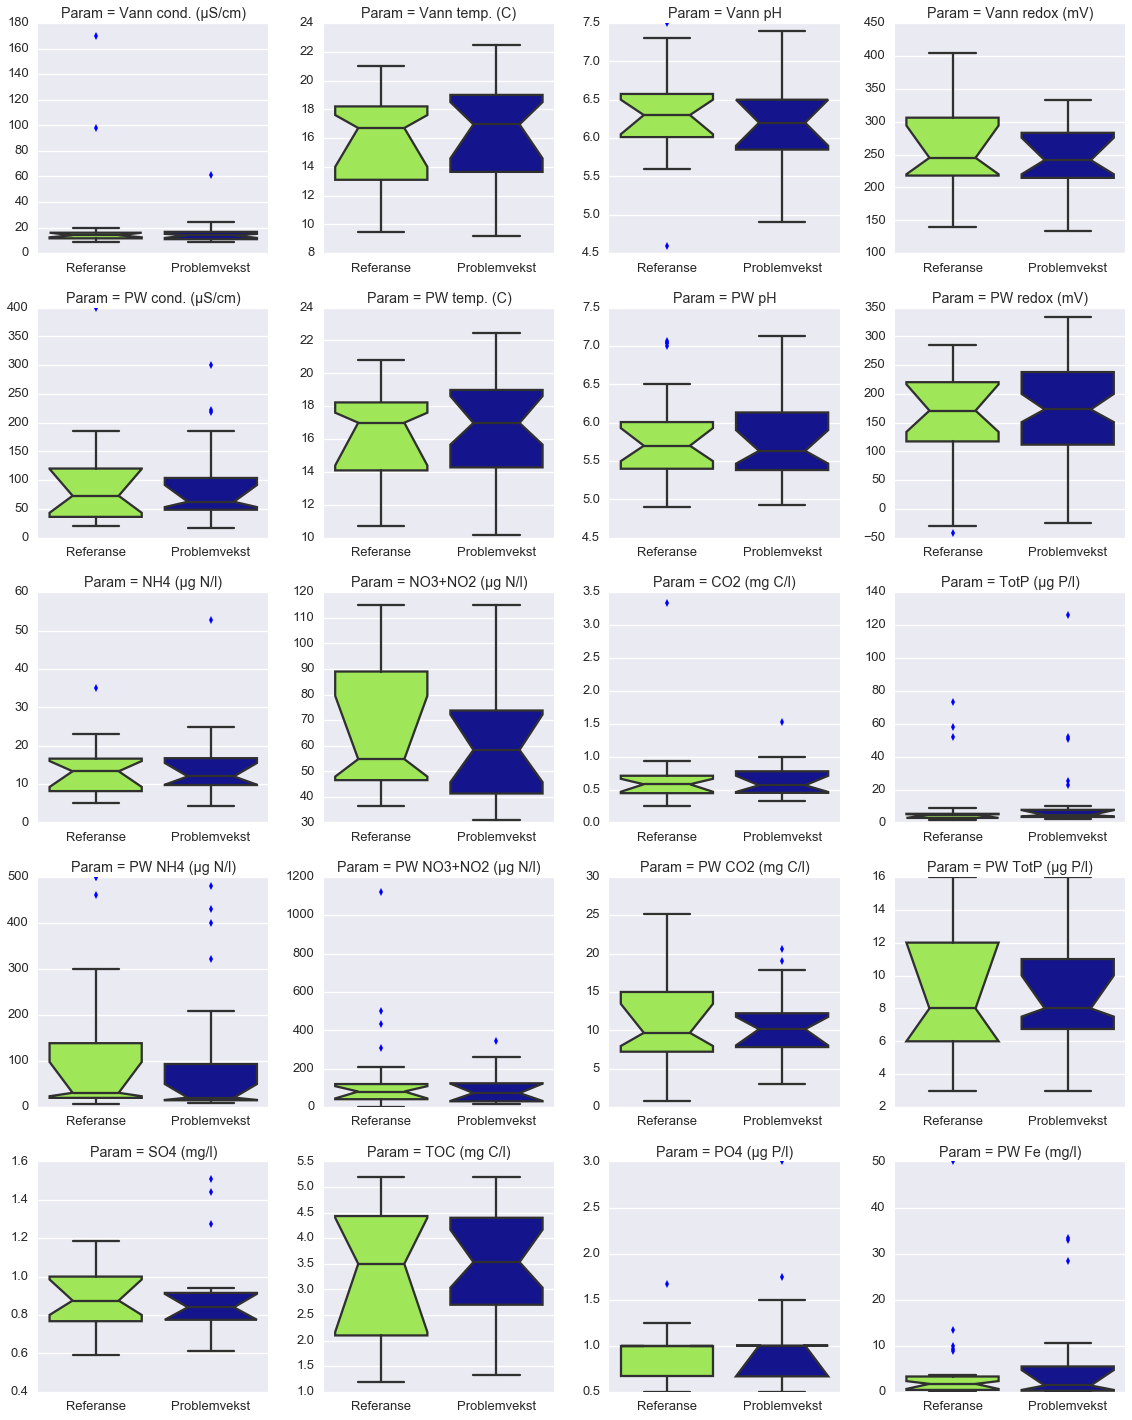

In [12]:
# Plot
g = sn.factorplot(x='Type', y='Value', 
                  col='Param', col_wrap=4,
                  data=df, 
                  kind='box',
                  notch=True,
                  bootstrap=1000,
                  col_order=[u'Vann cond. (µS/cm)', 'Vann temp. (C)', 'Vann pH', 'Vann redox (mV)',
                             u'PW cond. (µS/cm)', 'PW temp. (C)', 'PW pH', 'PW redox (mV)',
                             u'NH4 (µg N/l)', 'NO3+NO2 (µg N/l)', 'CO2 (mg C/l)', 'TotP (µg P/l)',
                             u'PW NH4 (µg N/l)', 'PW NO3+NO2 (µg N/l)', 'PW CO2 (mg C/l)', 'PW TotP (µg P/l)',
                             'SO4 (mg/l)', 'TOC (mg C/l)', u'PO4 (µg P/l)', 'PW Fe (mg/l)'],
                  sharex=False,
                  sharey=False,
                  palette={'Referanse':'#9FFF40',
                           'Problemvekst':'#0000A0'},
                  legend=False)

g.set(ylabel='')
g.set(xlabel='')
plt.tight_layout()

# Save
out_fold = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Plots'
out_path = os.path.join(out_fold, 'chem_by_type_all.png')
plt.savefig(out_path, dpi=300)

### 3.3c. Box plots of nuisance versus non-nuisance, split by year

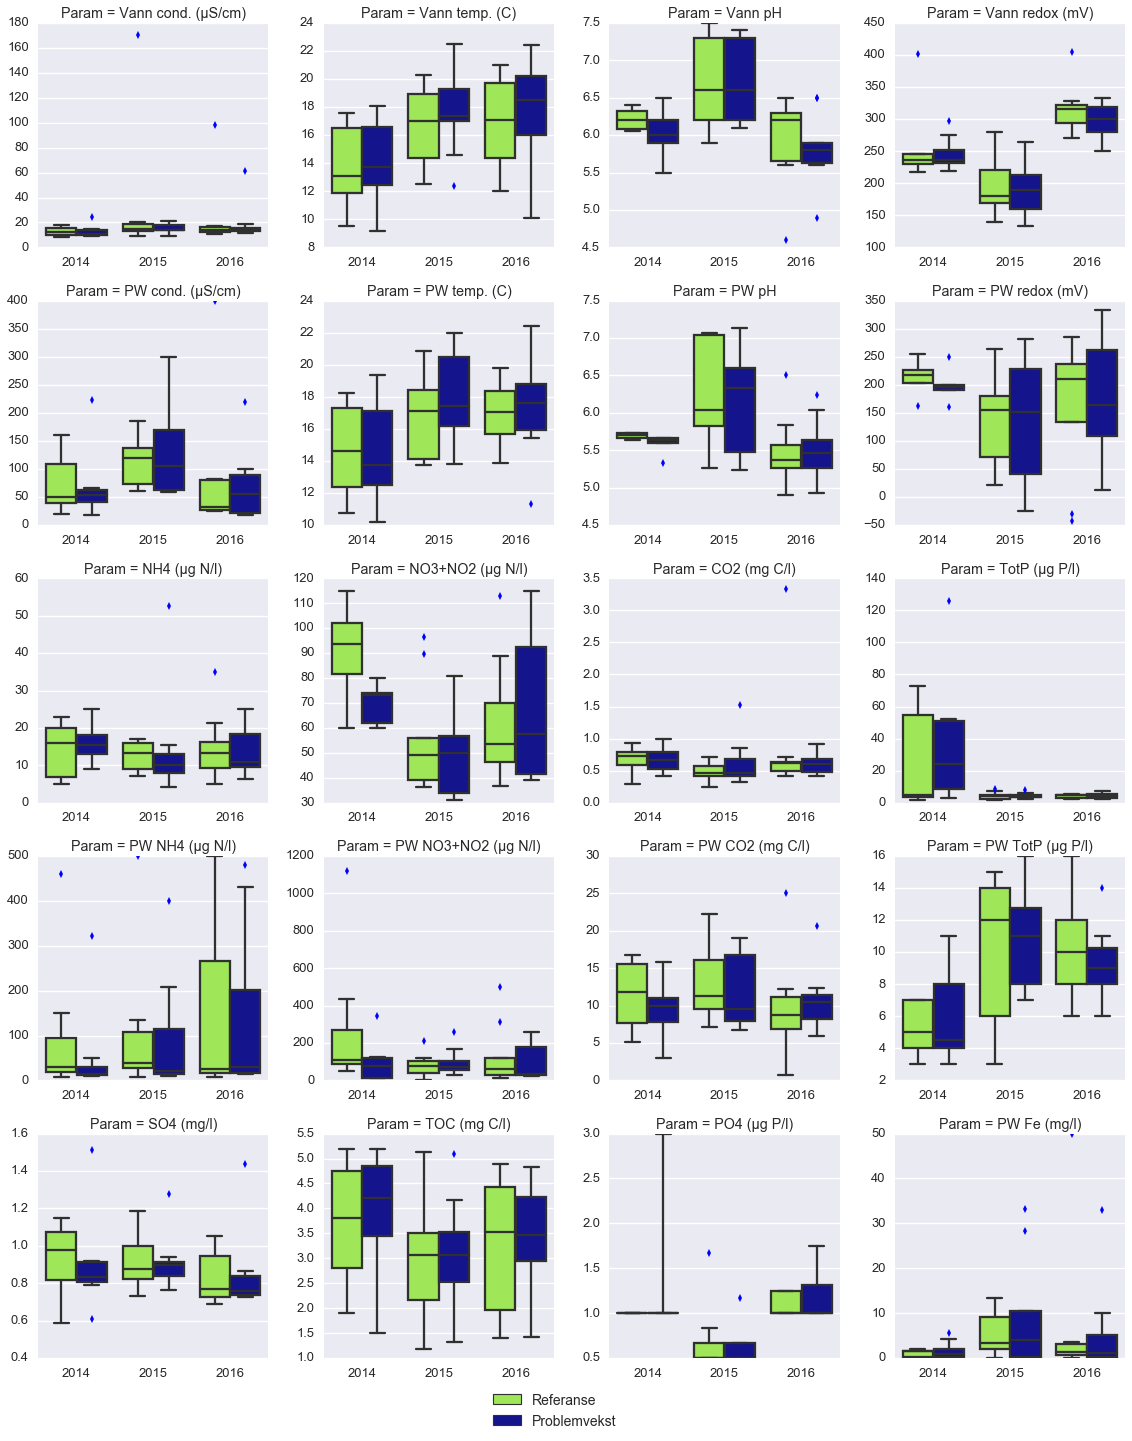

In [13]:
# Plot
g = sn.factorplot(x='Year', y='Value', hue='Type',
                  col='Param', col_wrap=4,
                  data=df, 
                  kind='box',
                  col_order=[u'Vann cond. (µS/cm)', 'Vann temp. (C)', 'Vann pH', 'Vann redox (mV)',
                             u'PW cond. (µS/cm)', 'PW temp. (C)', 'PW pH', 'PW redox (mV)',
                             u'NH4 (µg N/l)', 'NO3+NO2 (µg N/l)', 'CO2 (mg C/l)', 'TotP (µg P/l)',
                             u'PW NH4 (µg N/l)', 'PW NO3+NO2 (µg N/l)', 'PW CO2 (mg C/l)', 'PW TotP (µg P/l)',
                             'SO4 (mg/l)', 'TOC (mg C/l)', u'PO4 (µg P/l)', 'PW Fe (mg/l)'],
                  hue_order=['Referanse', 'Problemvekst'],
                  sharex=False,
                  sharey=False,
                  palette={'Referanse':'#9FFF40',
                           'Problemvekst':'#0000A0'},
                  legend=False)

g.set(ylabel='')
g.set(xlabel='')
g.axes[-1].legend(loc='upper left', bbox_to_anchor=(-1.8, -0.1), 
                  fontsize=14)
plt.tight_layout()
plt.subplots_adjust(bottom=0.05)

# Save
out_fold = r'C:\Data\James_Work\Staff\Therese_FM\Bulbous_Rushes\Plots'
out_path = os.path.join(out_fold, 'chem_box_by_type_year.png')
plt.savefig(out_path, dpi=300)